We will be working on the Rain in Austrailia Dataset. It a real time problem from the kaggle. The problem is to tke all the parameters of the given dataset and predict whether there it will be raining or not

##1. Importing necessary Libraries

In [ ]:
! pip install opendatasets

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 35.9 MB/s eta 0:00:00


In [ ]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os


In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 150)
# sns.set_style('darkgrid')
# matplotlib.rcParams['font.size']=14
# matplotlib.rcParams['figure.figsize']=(10,6)
# matplotlib.rcParams['figure.facecolor']='#00000000'


##2. Downloading the data
"account is lego8108"
"key is 77864af16c336206234264ab3dd51168"

In [ ]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lego8108
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 5.97MB/s]


In [ ]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [ ]:
df= pd.read_csv('/content/weather-dataset-rattle-package/weatherAUS.csv')

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## 3. Data preprocesing

In [ ]:
#Lets check the column type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#Lets drop any rows if the values of the target column are empy
df.dropna(subset=['RainTomorrow'], inplace=True)

### 3.1 Lets find the colummns which are mostly related

In [ ]:
# X = df.drop('RainTomorrow', axis=1)  # Features (all columns except the target)
# y = df['RainTomorrow']  # Target column

# categorical_cols = X.select_dtypes(include=['object', 'category']).columns
# for col in categorical_cols:
#   le=LabelEncoder()
#   X[col]=le.fit_transform(X[col])
# # Calculate the correlation matrix
# correlation_matrix = X.corrwith(y)

# # Create a heatmap plot of the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix with Target Column')
# plt.show()

we will be splitiing the data yearwise. last years may be for the test set and initial years for training set
as the target column is affected by the parameters in an yearwise pattern

Text(0.5, 1.0, 'No of rows per year')

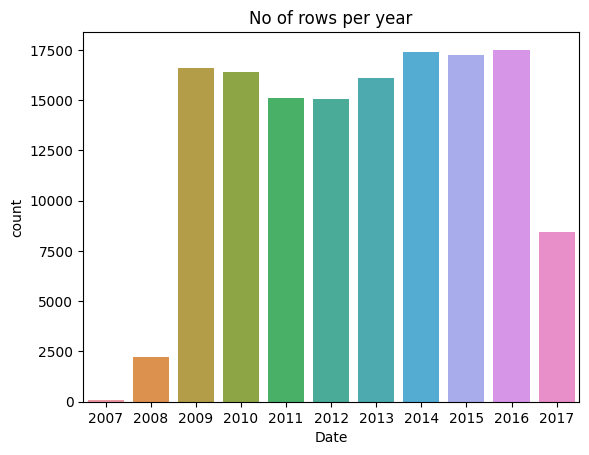

In [ ]:
sns.countplot(x=pd.to_datetime(df.Date).dt.year) #to convert and get the count plot on the Date column
plt.title('No of rows per year')

### 3.2 Now lets create the train and test dataframes


In [ ]:
year= pd.to_datetime(df.Date).dt.year

train_df= df[year<2015]
val_df= df[year==2015]
test_df=df[year>2015]

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


Lets Identify Input and target column. Here we will be selecting the required columns that are to be selected for input and target from the train, val and test dataframe.

In [ ]:
input_cols= list(train_df.columns)[1:-1]
target_col='RainTomorrow'

In [ ]:
train_inputs= train_df[input_cols].copy()
train_targets=train_df[target_col].copy()

In [ ]:
val_inputs= val_df[input_cols].copy()
val_targets=val_df[target_col].copy()

In [ ]:
test_inputs= test_df[input_cols].copy()
test_targets=test_df[target_col].copy()

3.3Lets Identify the numeric and categorical columns inside the data

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols= train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_cols)
print( categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


Study how various coulmns are correlated with the target and select just a subset of the columns instead of all . Observing how it affects the results

### 3.4Impute missing numeric values

In [ ]:
train_inputs[numeric_cols].isna().sum().sort_values(ascending=False)

Sunshine         40696
Evaporation      37110
Cloud3pm         36766
Cloud9am         35764
Pressure9am       9345
Pressure3pm       9309
WindGustSpeed     6902
Humidity9am       1265
Humidity3pm       1186
WindSpeed3pm      1140
WindSpeed9am      1133
Rainfall          1000
Temp9am            783
Temp3pm            663
MinTemp            434
MaxTemp            198
dtype: int64

In order to replace those null values with some value we will use SimpleImputer from the sklearn.impute

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean').fit(df[numeric_cols])

In [ ]:
train_inputs[numeric_cols]= imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])


In [ ]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### 3.5 Scaling Numeric Features

In [ ]:
!pip install -U scikit-learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
val_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-8.2,-3.2,0.0,0.0,0.0,7.0,0.0,0.0,4.0,0.0,988.1,982.2,0.0,0.0,-6.2,-4.0
max,31.9,45.4,247.2,70.4,14.5,135.0,87.0,74.0,100.0,100.0,1039.3,1037.3,8.0,8.0,37.5,42.8


In [ ]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [ ]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])



In [ ]:
val_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


* Why min max scaler?
* Try another scaler and check the result


* we choose MinMaxScaler when you want to scale your features to a fixed range, have bounded feature values, need interpretability, and/or are working with neural networks or gradient descent-based algorithms.

* StandardScaler when your data approximately follows a normal distribution, or when your algorithm relies on distance-based metrics and requires features with zero mean and unit variance

### 3.6 Encoding the categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
# train_inputs

In [ ]:
# train_df[categorical_cols].isna().sum()

In [ ]:
# train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('Unknown')
# test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('Unknown')
# val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna('Unknown')


In [ ]:
# train_inputs

In [ ]:
encoder= OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [ ]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])


<ipython-input-39-ba594fb6c785>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
<ipython-input-39-ba594fb6c785>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
<ipython-input-39-ba594fb6c785>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

In [ ]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,Albury,0.516509,0.523629,0.001617,0.037723,0.525852,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037723,0.525852,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037723,0.525852,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037723,0.525852,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037723,0.525852,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037723,0.525852,SSE,0.286822,ESE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144549,Uluru,0.556604,0.786389,0.000000,0.037723,0.525852,NE,0.193798,ENE,SW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144550,Uluru,0.608491,0.805293,0.000000,0.037723,0.525852,ESE,0.255814,ESE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144551,Uluru,0.674528,0.818526,0.000000,0.037723,0.525852,ESE,0.286822,ESE,SSW,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


lets drop textual categorical columns so that we are just left with numeric data

In [ ]:
x_train=train_inputs[numeric_cols + encoded_cols]
x_val=val_inputs[numeric_cols + encoded_cols]
x_test=test_inputs[numeric_cols + encoded_cols]

## 4. Training and Visualizing Decision Trees

Decision tree in general represents a hirerachical series of binary decisions

Lets Understand Decicion Tree
* root node: this is the node that begins the splitting process by finding the variable that best splits the target variable
* Node purity: Decision nodes are typically impure, or a mixture of both classes of the target variable (0,1 or rain or not rain). Pure nodes are those that have one class — hence the term pure.
* Decision nodes: these are subsequent or intermediate nodes, where the target variable is again split further by other variables
* Leaf nodes or terminal nodes are pure nodes, hence are used for making a prediction of a numerical or class is made.
2 ways to split a node
 1. By entropy : it is a measure of disorder or impurity in a node. Leaf nodes which have all instances belonging to 1 class would have an entropy of 0. Whereas, the entropy for a node where the classes are divided equally would be 1.

 2. By GINI Index:
 The Gini Index or Impurity measures the probability for a random instance being misclassified when chosen randomly. The lower the Gini Index, the better the lower the likelihood of misclassification.

In [ ]:
import sklearn
print(sklearn.__version__)
# from sklearn.tree import BaseDecisionTree

1.3.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model= DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
model.fit(x_train, train_targets)

CPU times: user 3.52 s, sys: 30.9 ms, total: 3.55 s
Wall time: 3.6 s


DecisionTreeClassifier(random_state=42)

### Evaluation

In [ ]:
train_preds= model.predict(x_train)

In [ ]:
x_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.613208,0.701323,0.002695,0.037723,0.525852,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.718336,0.000000,0.037723,0.525852,0.286822,0.184615,0.298851,0.22,0.13,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144549,0.556604,0.786389,0.000000,0.037723,0.525852,0.193798,0.146154,0.229885,0.16,0.08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144550,0.608491,0.805293,0.000000,0.037723,0.525852,0.255814,0.200000,0.103448,0.15,0.08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144551,0.674528,0.818526,0.000000,0.037723,0.525852,0.286822,0.215385,0.195402,0.22,0.09,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

In [ ]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(train_preds, train_targets)

0.9999797955307714

In [ ]:
train_probs=model.predict_proba(x_train)

In [ ]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Training set accuracy is too good

In [ ]:
model.score(x_val, val_targets)

0.7921188555510418

The accuracy on training was high but its only 79% in val data

In [ ]:
val_targets.value_counts()/len(val_targets)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

It can be seen that accuracy on val set is just like marginally better than saying no for every example.

It simply means that our model is overfitting

### Visualization

In [ ]:
from sklearn.tree import plot_tree, export_text

In [ ]:
x_train.columns


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

since x_train cols are indexes the plot tree function wont support it so we will make it in the form of the list

In [ ]:
x_train_col=list(x_train.columns)

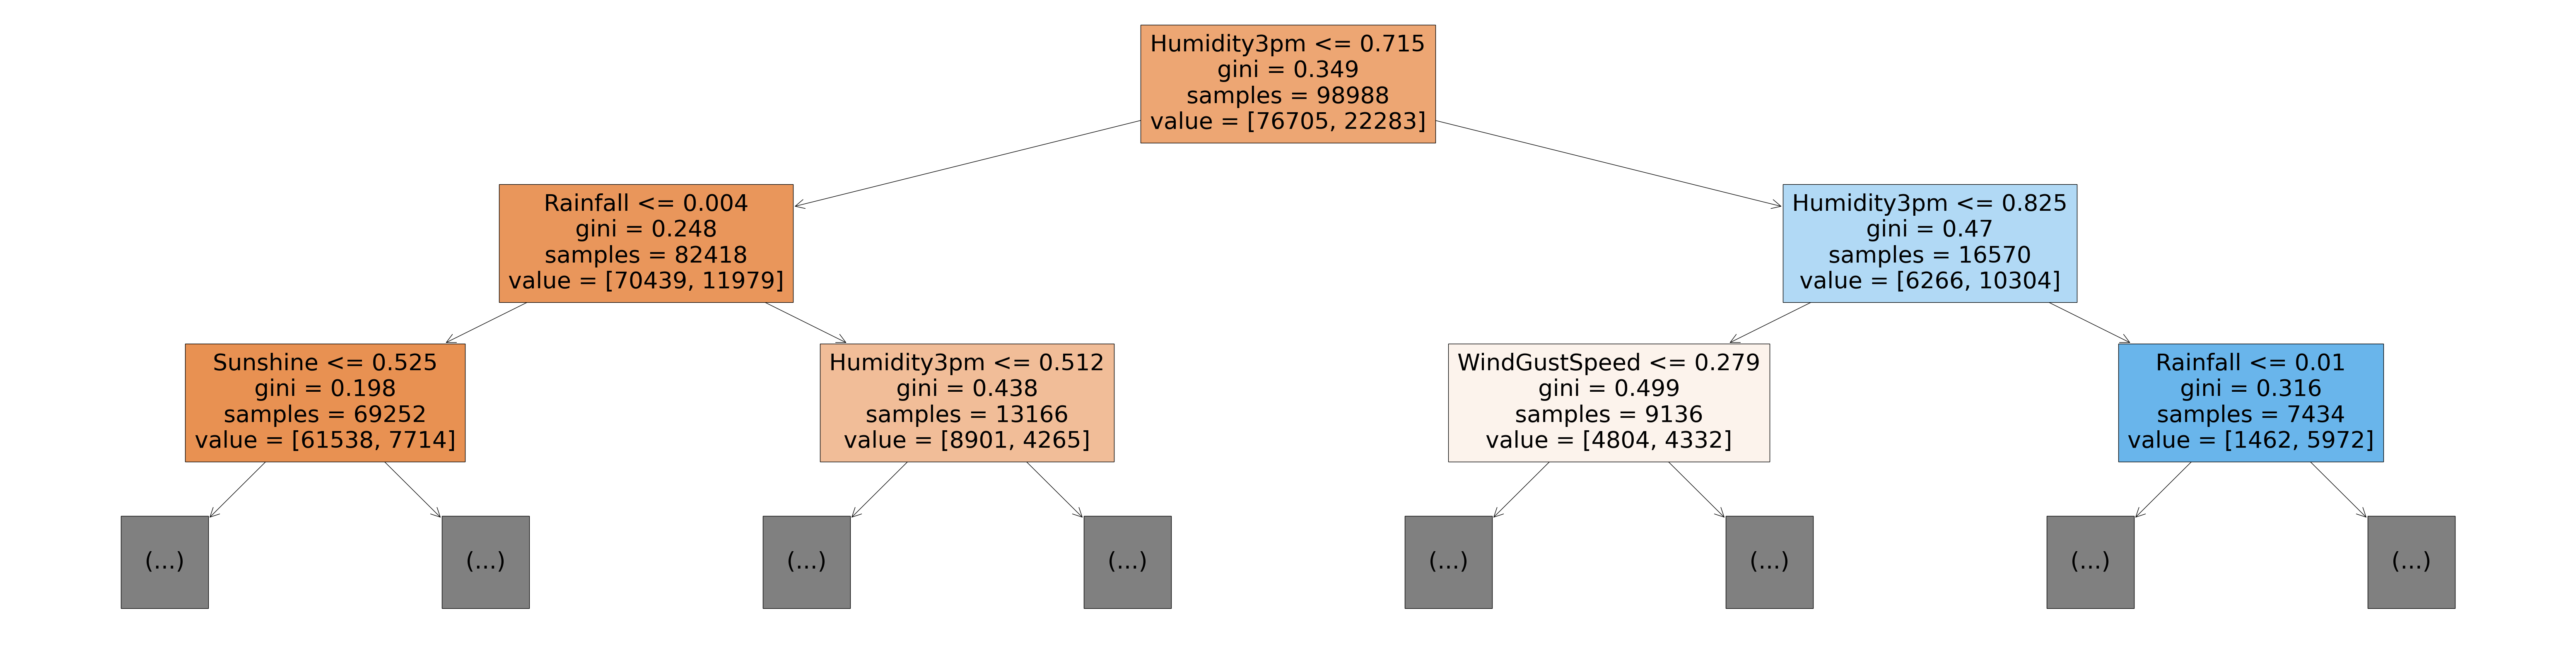

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=x_train_col, max_depth=2, filled=True);

How does gini index works in this ?
Note the gini value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0.



![Gini](/content/gini.jpg)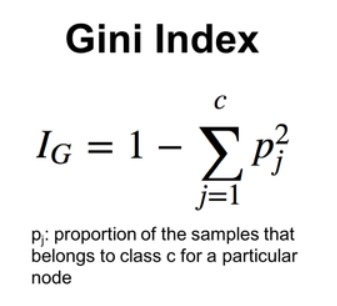

Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

The iterative approach of the machine learning workflow in the case of a decision tree involves growing the tree layer-by-layer:

In [ ]:
model.tree_.max_depth

48

In [ ]:
tree_text=export_text(model, max_depth=10, feature_names=list(x_train_col))

In [ ]:
 print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

### Feature Importance

based on the gini index computations a decision tree assigns an importance value to each feature. These values can be used to interpret the results given by a decision tree

In [ ]:
model.feature_importances_, x_train.columns

(array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
        4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
        4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
        1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
        2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
        1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
        1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
        1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
        4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
        1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
        2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
        1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
        1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
        9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.127368

Lets turn this into a dataframe and visualize the most importanct features

In [ ]:
importance_df= pd.DataFrame({'feature':x_train.columns,
                             'importance':model.feature_importances_}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


Text(0.5, 1.0, 'Feature Importance')

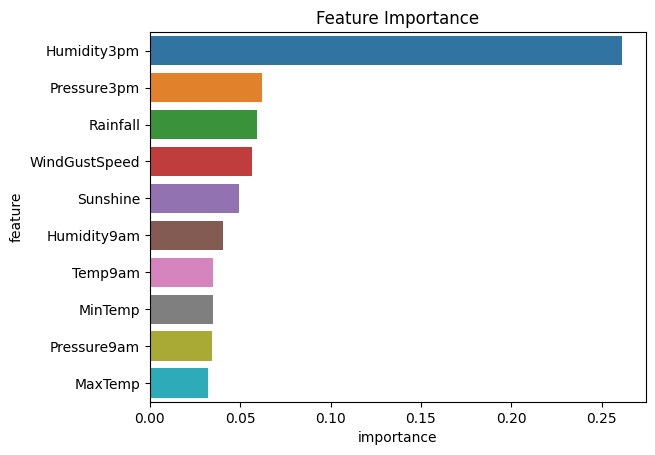

In [ ]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Feature Importance')

##Overfitting and Hyperparameter Tuning

* max_depth
* max_leaf_nodes

### Max Depth

In [ ]:
model.tree_.max_depth

48

In [ ]:
model=DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.fit(x_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.score(x_train, train_targets)

0.8291308037337859

In [ ]:
model.score(x_val, val_targets)

0.8334397307178921

Decrease in the depth reduced the Overfitting in the model and increasing the val accuracy.This happened because earlier the model was memorizing the entire examples which we dont want but we want the model to learn general trends and relations

In [ ]:
model.classes_
model_classes=list(model.classes_)

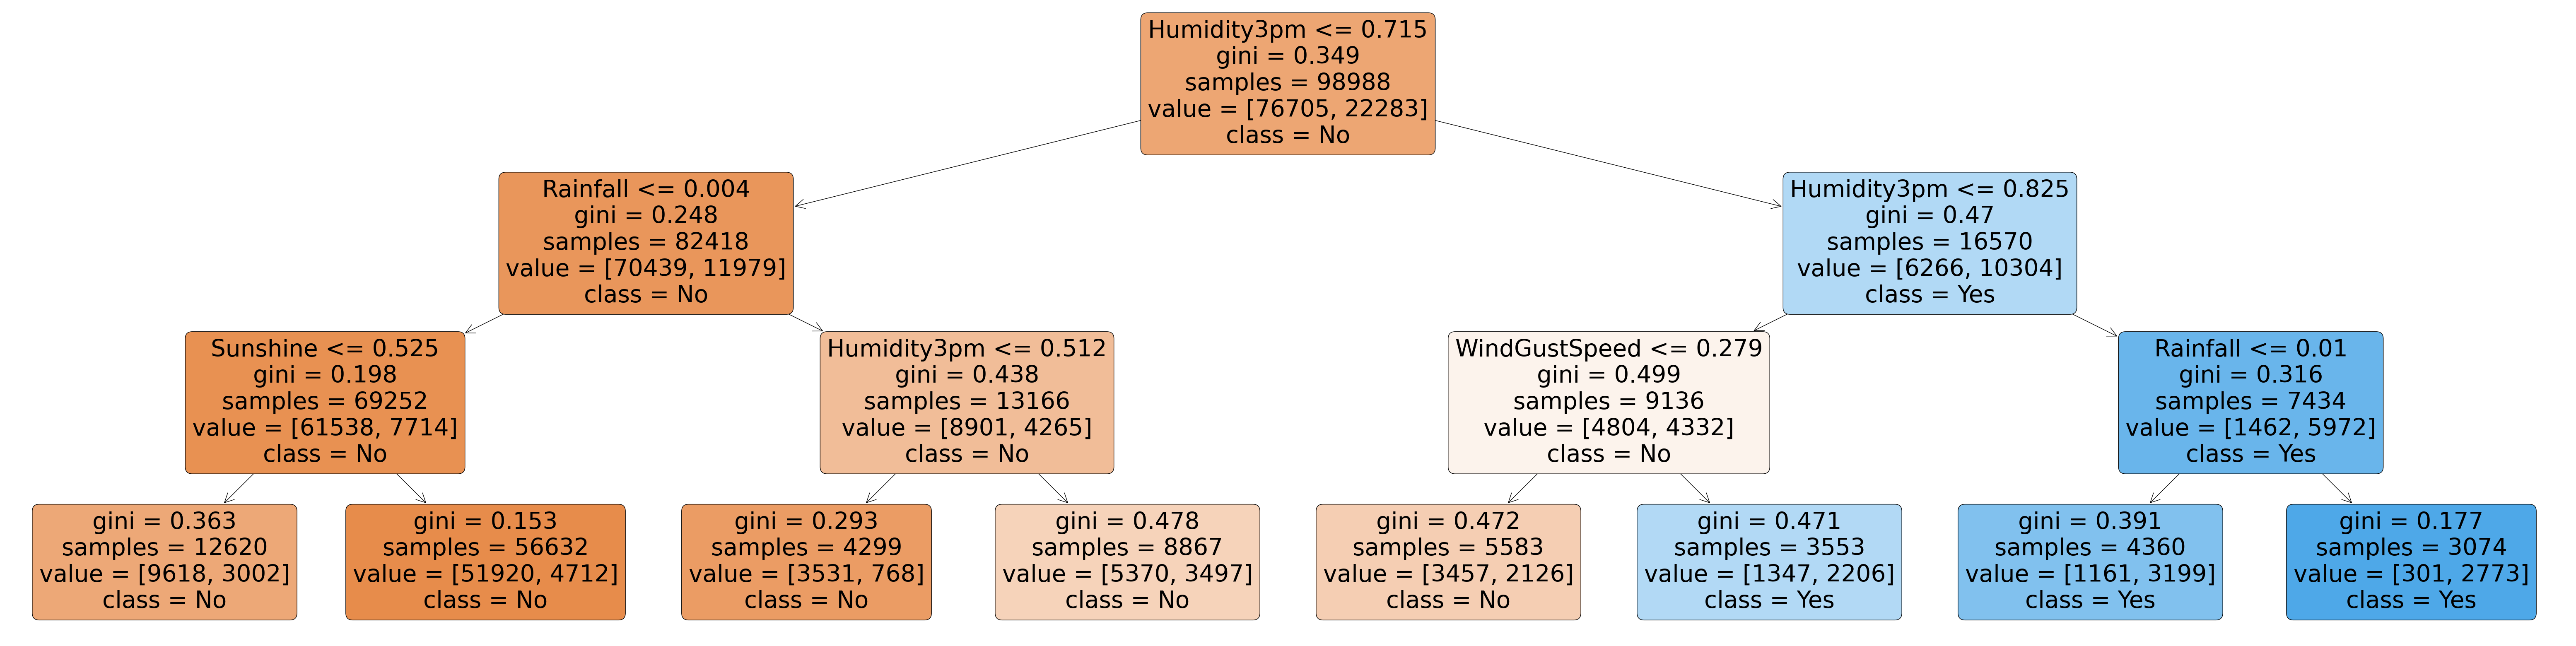

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=x_train_col, filled=True, rounded=True, class_names=model_classes);

what is gini, samples, value and class mean in the tree.

Similary we can plot the textual plot

In [ ]:
def max_depth_error(md):
  model=DecisionTreeClassifier(max_depth=md, random_state=42)
  model.fit(x_train, train_targets)
  train_acc=1-model.score(x_train, train_targets)
  val_acc= 1- model.score(x_val, val_targets)
  return {'max depth':md, 'training error': train_acc, 'validationnerror': val_acc}

In [ ]:
%%time
errors_df=pd.DataFrame([max_depth_error(md) for md in range(1,21)])

CPU times: user 49.9 s, sys: 488 ms, total: 50.4 s
Wall time: 1min 2s


In [ ]:
errors_df

,max depth,training error,validationnerror
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


now lets plot this in order to understand the depth and accuracy relation

<ipython-input-78-78dd6e990db4>:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('training', 'validation')


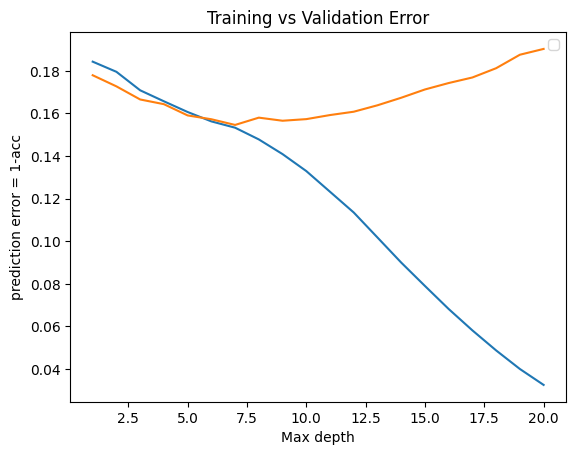

In [ ]:
plt.figure()
plt.plot(errors_df['max depth'], errors_df ['training error'])
plt.plot(errors_df['max depth'], errors_df ['validationnerror'])
plt.title('Training vs Validation Error')
plt.xlabel('Max depth')
plt.ylabel('prediction error = 1-acc')
plt.legend('training', 'validation')


In [ ]:
model= DecisionTreeClassifier(max_depth=7, random_state=42).fit(x_train, train_targets)
model.score(x_val, val_targets)

0.8453949277465034

### Max Leaf Nodes

another way to control the size of a decision tree is to limit the number of the leaf nodes. this allows branches of the tree to have varying depths

In [ ]:
model= DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
model.fit(x_train, train_targets)
print(model.score(x_train, train_targets))
print(model.score(x_val, val_targets))
model.tree_.max_depth

0.8480421869317493
0.8442342290058615


12

It can be seen that the model was able to achieve a greater depth of 12 for certain paths while keeping depth of others paths shorter

## Random Forest

A collection of trees with different hyperparameters. Each tree will vote for a particular class and the winner of the poll will be selected.

The ensemble learning differs from the RandomForest in a way that it utilizes the poll of different models working on different algorithm not necessarily be a decision tree algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model= RandomForestClassifier(n_jobs=-1, random_state=42) #n_jobs will allow RandomForest to use multiple workers to train decison trees

In [ ]:
%%time
model.fit(x_train, train_targets)

CPU times: user 39.8 s, sys: 311 ms, total: 40.1 s
Wall time: 23.8 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(x_train, train_targets)

0.9999494888269285

In [ ]:
model.score(x_val, val_targets)

0.8566537055307295

In [ ]:
train_probs= model.predict_proba(x_train)
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [ ]:
len(model.estimators_[0])

TypeError: ignored

[Text(0.5, 0.875, 'Sunshine <= 0.403\ngini = 0.347\nsamples = 62607\nvalue = [76887, 22101]'),
 Text(0.25, 0.625, 'Pressure9am <= 0.609\ngini = 0.499\nsamples = 11288\nvalue = [9272, 8542]'),
 Text(0.125, 0.375, 'Cloud9am <= 0.833\ngini = 0.475\nsamples = 6067\nvalue = [3702, 5808]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustDir_NNE <= 0.5\ngini = 0.442\nsamples = 5221\nvalue = [5570, 2734]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RainToday_Yes <= 0.5\ngini = 0.278\nsamples = 51319\nvalue = [67615, 13559]'),
 Text(0.625, 0.375, 'Pressure9am <= 0.521\ngini = 0.207\nsamples = 41960\nvalue = [58514, 7796]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Pressure9am <= 0.614\ngini = 0.475\nsamples = 9359\nvalue = [9101, 5763]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

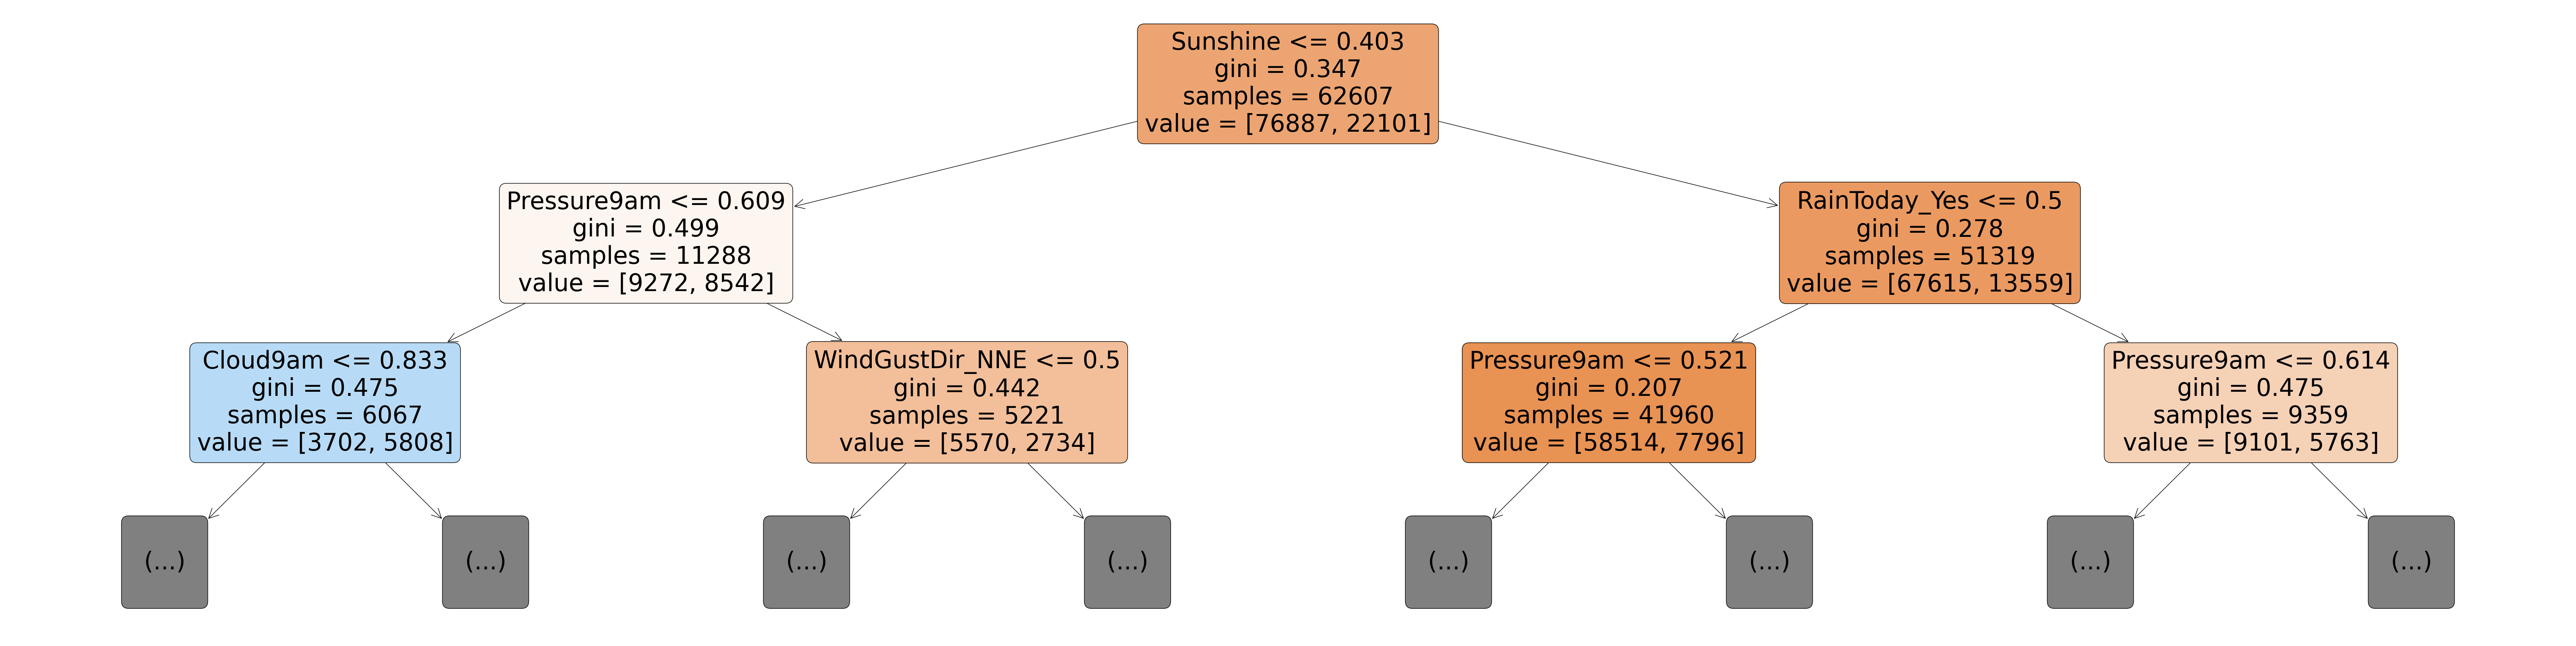

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=list(x_train.columns), filled=True, rounded=True)

[Text(0.5, 0.875, 'Sunshine <= 0.417\ngini = 0.349\nsamples = 62448\nvalue = [76707, 22281]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.745\ngini = 0.499\nsamples = 11821\nvalue = [9860, 8914]'),
 Text(0.125, 0.375, 'Humidity3pm <= 0.625\ngini = 0.45\nsamples = 7988\nvalue = [8315, 4320]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.217\ngini = 0.377\nsamples = 3833\nvalue = [1545, 4594]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Location_MountGinini <= 0.5\ngini = 0.278\nsamples = 50627\nvalue = [66847, 13367]'),
 Text(0.625, 0.375, 'Location_Moree <= 0.5\ngini = 0.273\nsamples = 49365\nvalue = [65436, 12778]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Humidity9am <= 0.665\ngini = 0.416\nsamples = 1262\nvalue = [1411, 589]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')

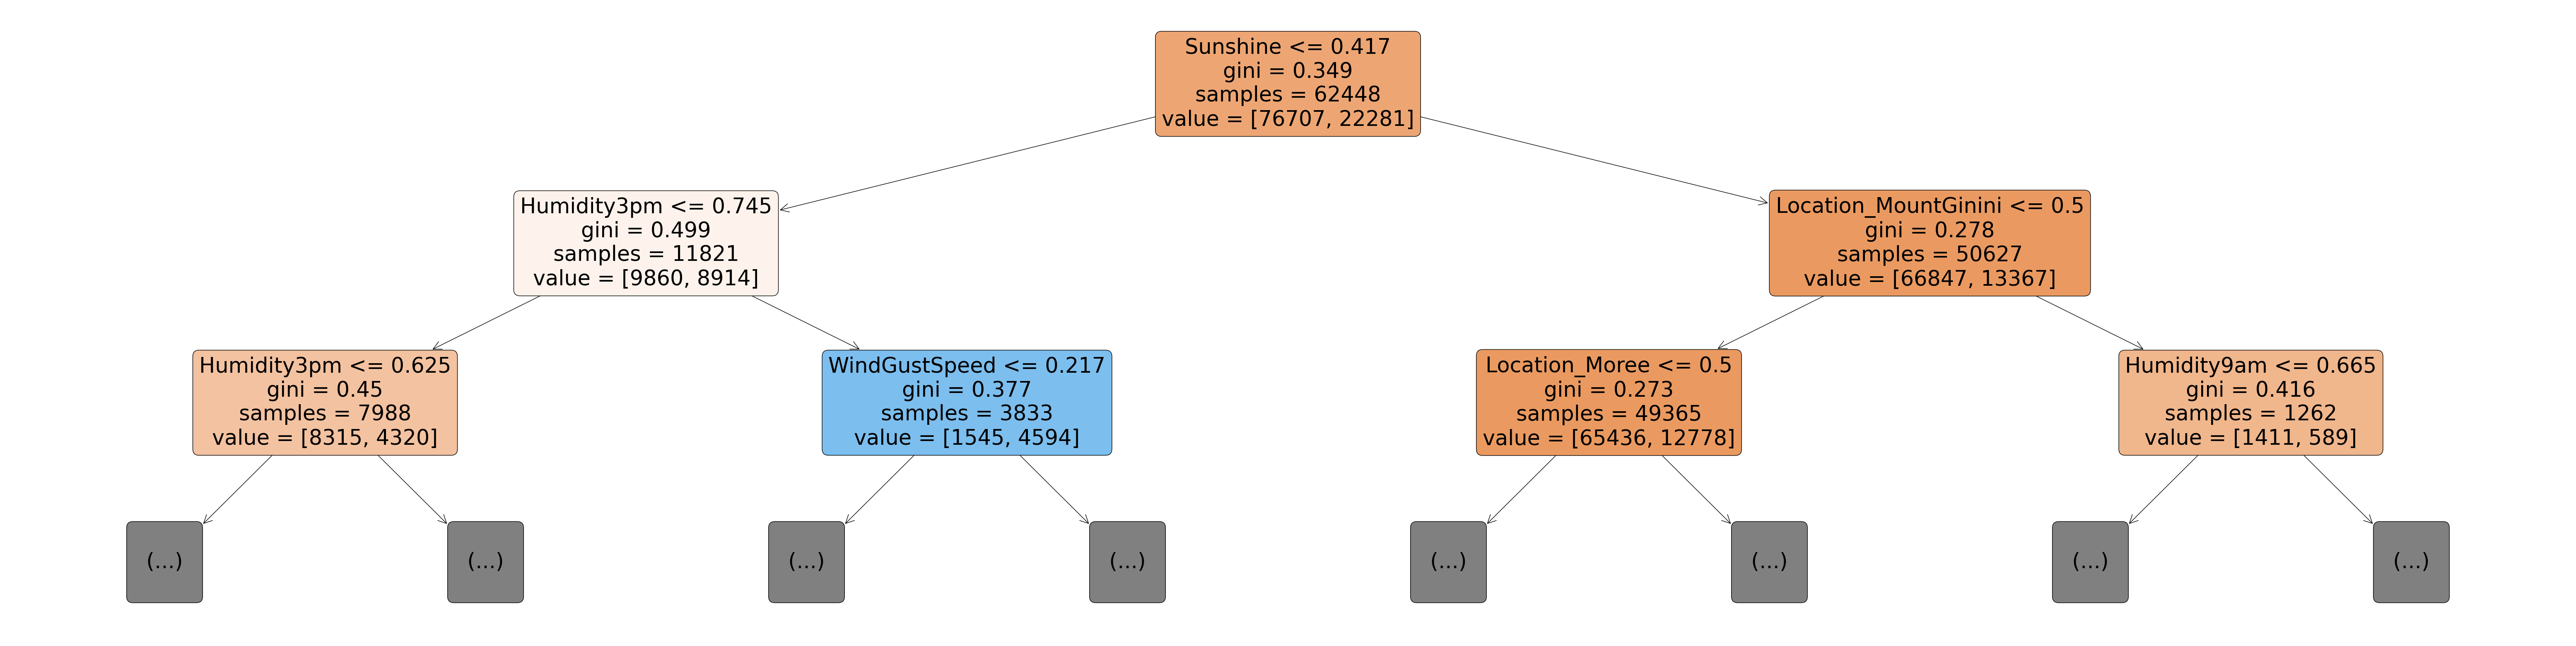

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[15], max_depth=2, feature_names=list(x_train.columns), filled=True, rounded=True)

It can be seen that not all the decision tree are same

In [ ]:
importance_df = pd.DataFrame(
    {'feature': x_train.columns,
    'importance': model.feature_importances_ }).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139904
4,Sunshine,0.053696
11,Pressure3pm,0.052713
8,Humidity9am,0.050051
2,Rainfall,0.048077
10,Pressure9am,0.047944
5,WindGustSpeed,0.047477
15,Temp3pm,0.044379
1,MaxTemp,0.041865
0,MinTemp,0.041199


<Axes: title={'center': 'feature Importance'}, xlabel='importance', ylabel='feature'>

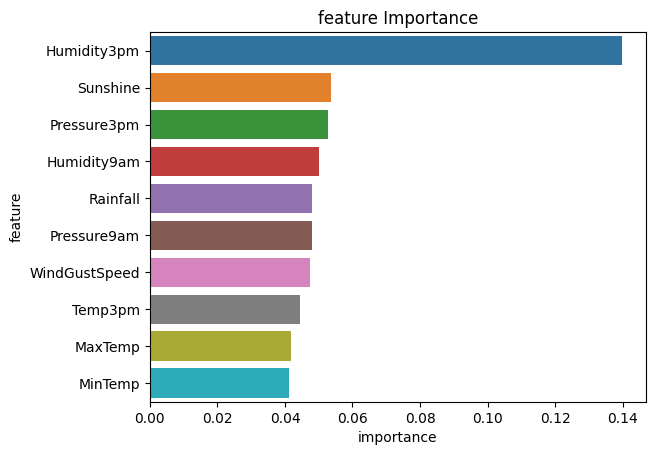

In [ ]:
plt.title('feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

## Hyperparameter Tuning with Random Forest

In [ ]:
# ?RandomForestClassifier

In [ ]:
base_model=RandomForestClassifier(random_state=42, n_jobs=-1).fit(x_train, train_targets)

In [ ]:
base_train_acc= base_model.score(x_train, train_targets)
base_val_acc= base_model.score(x_val, val_targets)

In [ ]:
base_train_acc, base_val_acc

(0.9999494888269285, 0.8566537055307295)

### n_estimators

this arg controls the no of decision trees and default is 100.

In [ ]:
model=RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [ ]:
model.fit(x_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
model.score(x_train, train_targets), model.score(x_val, val_targets)

(0.986958015112943, 0.8485868492832686)

Lets increase the estimators to 500

In [ ]:
model=RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(x_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
model.score(x_train, train_targets), model.score(x_val, val_targets)

(0.9999797955307714, 0.8577563693343393)

The change is not so huge that can be taken into consideration

###**max_depth** and max_leaf_nodes

In [ ]:
def test_params(**params):
  model=RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, train_targets)
  return model.score(x_train, train_targets), model.score(x_val, val_targets)

In [ ]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [ ]:
test_params(max_depth=26)

(0.9814826039519942, 0.8572340549010504)

In [ ]:
test_params(max_leaf_nodes=2**5)

(0.8314341132258456, 0.833904010214149)

In [ ]:
test_params(max_leaf_nodes=2**20)

(0.9999595910615429, 0.8568278103418258)

### max_features

instead of picking all feature for evry split we can specify that only a fraction  of features be choosen randomly to figure out a split.


We need to take care of the fact that model neither needs to have a very less number feature casuing no learning and at the same time it shouldnt be counting upon all the features causing overfitting

In [ ]:
test_params(max_features='log2')

In [ ]:
test_params(max_features=3)

(0.9999494888269285, 0.8543323080494458)

In [ ]:
test_params(max_features=20)

(0.9999595910615429, 0.8565956705936975)

### min_samples_split and min_samples_leaf
The first one represents the number of examples required to consider a decisin node a node

The latter one represents the no of samples for splitting

In [ ]:
test_params(min_samples_split=5, min_samples_leaf=2)

(0.9573584676930537, 0.855144797167895)

In [ ]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8495676243585081, 0.8451047530613429)

### min_impurity_decrease
so there must be significant reduction in GINI value as we go down. Thus node must be split if there is min_impurity_decrease in GINI value

In [ ]:
test_params(min_impurity_decrease=1e-7)

(0.9996060128500425, 0.8561313910974406)

In [ ]:
test_params(min_impurity_decrease=1e-2)

(0.9201115286701418, 0.8547965875457025)

### bootstrap, max_samples
randomly picking the different rows with replacement for each tree. The randomly selected rows together for a particular tree will be making a fraction of dataset.

Here its taking a bootstrap and training a decision tree again picking a bootstrap and again training. Sometimes its also called bag of bootstrap i.e 'bagging'

if bootstrap is False the decision Trees will be trained on the entire dataset. We can select the size of bootstrap by giving the max_samples as a pert. limit

In [ ]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [ ]:
test_params(max_samples=0.9)

(0.9997676486038711, 0.8565376356566653)

### class_weight

In [ ]:
train_targets.value_counts()

No     76705
Yes    22283
Name: RainTomorrow, dtype: int64

There is a lot of class imbalance that can be seen here so we can give classes  a weight

In [ ]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8553769369160235)

In [ ]:
test_params(class_weight={'No':1, 'Yes':2})

(0.9999595910615429, 0.8558412164122802)

###Putting all together

In [ ]:
model = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=500,
                               max_features=7,
                               max_depth=30,
                               class_weight={'No':1, 'Yes':1.5})

In [ ]:
model.fit(x_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [ ]:
model.score(x_train, train_targets), model.score(x_val, val_targets)

(0.9920192346547057, 0.8563054959085369)

We've increased the accuracy from 84.5% with a single decision tree to 85.7% with a well-tuned random forest. Depending on the dataset and the kind of problem, you may or may not a see a significant improvement with hyperparameter tuning.

This could be due to any of the following reasons:

* We may not have found the right mix of hyperparameters to regularize (reduce overfitting) the model properly, and we should keep trying to improve the model.

* We may have reached the limits of the modeling technique we're currently using (Random Forests), and we should try another modeling technique e.g. gradient boosting.

* We may have reached the limits of what we can predict using the given amount of data, and we may need more data to improve the model.

* We may have reached the limits of how well we can predict whether it will rain tomorrow using the given weather measurements, and we may need more features (columns) to further improve the model. In many cases, we can also generate new features using existing features (this is called feature engineering).

* Whether it will rain tomorrow may be an inherently random or chaotic phenomenon which simply cannot be predicted beyond a certain accuracy any amount of data for any number of weather measurements with any modeling technique.